In [274]:
import matplotlib.pyplot as plt
import numpy as np
import mpmath as mp
from scipy.integrate import quad
from scipy.integrate import fixed_quad
import astropy.constants as C
import astropy.units as u
import sympy as sp
import math
from tqdm import tqdm

kpc = C.kpc.to_value()
pc = C.pc.to_value()
# m = act.meter.to_value()
c = C.c.to_value()
MSun = C.M_sun.to_value()
G_num = C.G.to_value()
# yr = 3.154e7 # seconds
# day = 86400 # seconds
x = sp.Symbol('x')
L = sp.Symbol('L')
m = sp.Symbol('m')
t_E = sp.Symbol('t_E')
u_min = sp.Symbol('u_min')
u_T = sp.Symbol('u_T')
RSun=act.R_sun.to_value()

rho_0 = 0.0079 * (C.M_sun/u.pc**3).decompose() # local DM density
r_0 = 8.5 * u.kpc # distance from the Sun to the galaxy core
a = 5 * u.kpc # galaxy core radius
L = 50 * u.kpc # distance to the LMC stars
b = -32.8 # degrees - galactic coordinate
l = 281 # degrees - galactic coordinate

v_c = (220 * u.km/u.s).decompose()
# v_c = v_rot.value

In [276]:
def R_0(x, m): # input in x = distance/L and m = mass in solar masses
  
  arg = ((4*C.G * m*u.M_sun * L * x * (1 - x))/(C.c)**2).decompose()
  result = np.sqrt(abs(arg)).decompose()
  
  return result

def r(x): # input in x = distance/L 

  return (np.sqrt((r_0)**2 + (x*L)**2 - 2 * (r_0) * (x*L) * np.cos(math.radians(l))*np.cos(math.radians(b)))).decompose()

def rho_DM(x): # input in x = distance/L

  term1 = a**2 + r_0**2
  term2 = a**2 + r(x)**2

  return (rho_0 *(term1/term2)).decompose()



In [277]:
def integrand(x, t, m, u_T):
    Q = (4 * R_0(x,m)**2 * u_T)/((t*u.year)**2 * v_c**2).decompose()
    exp_factor = np.exp(-Q)
    factor = 32*L/((m*C.M_sun) * (t*u.year)**4 * v_c**2)

    integ = (factor * rho_DM(x) * exp_factor * R_0(x,m)**4 * u.year**2).decompose()

    return integ

@np.vectorize
def event_rate(t, m, u_T):

    integral = fixed_quad(integrand, 0, 1, args=(t, m, u_T), n=10000)[0]

    return integral

In [279]:
t_hat = np.logspace(-3, 4, 200)

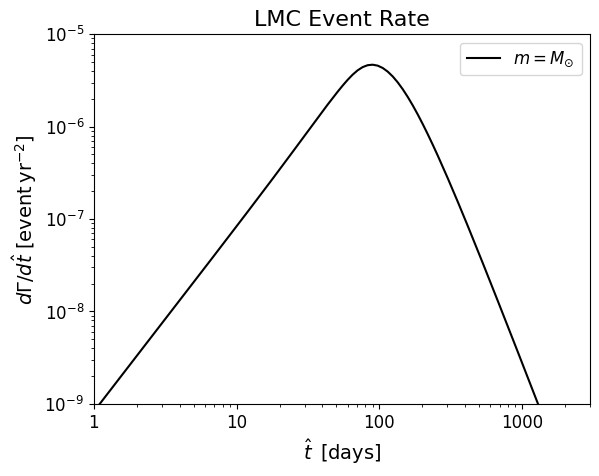

In [280]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots()
ax.set_title('LMC Event Rate', fontsize=16)
ax.loglog(t_hat*365, event_rate(t=t_hat, m=1, u_T=1), color='black', label=r'$m = M_{\odot}$')
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax.set_xlabel(r'$\hat{t}\,$ [days]', fontsize=14)
ax.set_ylabel(r'$d\Gamma/d\hat{t}\,\, \mathrm{[event\, yr^{-2}}]$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)


plt.ylim(1e-9, 1e-5)
plt.xlim(1,3000)

plt.show()